# Caso estudio CRM - Insurance Company

- 1 database = 20k , 9% Sales - Premium Offered (3 productos)
- 1 database = 10k no previamente contactado

***

* MODEL 1 = CLASIFICACION  - SALES w/o Premium Offered
* MODEL 2 = CLASIFICACION - SALES with Premium Offered (random - técnicas de clasificación multiple).

El cliente ha sido contactado por teléfono y recibe una oferta: 
- contrata
- no contrata

* * *

## Data Science Workflow Stage

1. EDA (Análisis Exploratorio)
2. Preparación y limpieza (categóricas y númericas)
3. Feature Engineering (creación de nuevos atributos)
4. Búsqueda de patrones y visualización más avanzada
5. Binarización, Normalización, Estandarización
6. Modelos y soluciones
7. Evaluación de los modelos
8. Conclusiones y presentación de los resultados
9. Despliegue en (cloud, on-premise, en local!!!)
10. Revisión y mejora continua

* * *
## Importar las librerías y módulos

In [2]:
# Check the versions of libraries on MacOS12

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Dec 30 2019, 19:38:36) 
[Clang 10.0.0 (clang-1000.11.45.5)]
scipy: 1.4.1
numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.1
sklearn: 0.22.1


In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy.stats import norm, skew
from scipy import stats
import xlrd, xdrlib

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# data mining
#from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn import impute
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer, minmax_scale)

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

* * *
## Load dataset


In [4]:
# Read the excel files, sheets_name are:
# 0 = index
# 1 = first database classified 20k
# 2 = second database not classified 10k

xls = pd.ExcelFile("../../DS/Deloitte/Database.xlsx")
data_0 = pd.read_excel(xls, sheet_name=0)
data_1 = pd.read_excel(xls, sheet_name=1)
data_2 = pd.read_excel(xls, sheet_name=2)

In [5]:
data_0

Variable Name  \
0                               Obs   
1                             Sales   
2                 Price Sensitivity   
3                         PhoneType   
4                             Email   
5                            Tenure   
6                 NumberofCampaigns   
7                        ProdActive   
8                        ProdBought   
9                   Premium Offered   
10                   Phone Call Day   
11                     CodeCategory   
12                        Birthdate   
13                     Product Type   
14         Number of Semesters Paid   
15              Socieconomic Status   
16                         Province   
17                    Right Address   
18                Living Area (m^2)   
19                      House Price   
20                           Income   
21                        yearBuilt   
22                  House Insurance   
23                     Pension Plan   
24         Estimated number of cars   
25  Probability of Second Residence   
26                           Credit   
27                          Savings   
28          Number of Mobile Phones   
29            Number of Fixed Lines   
30                             ADSL   
31                       3G Devices   
32                    Type of House   

                                              Meaning  
0                              Number of Observations  
1   It indicates whether the client bought a produ...  
2   It indicates the client's sensitivity to the p...  
3                Client's phone type: Fixed or Mobile  
4   It indicates whether the client's email is ava...  
5   Client's tenure (year when the person became a...  
6          Number of times the client has been called  
7                           Number of active products  
8      Number of different products previously bought  
9                       Premium offered to the client  
10                     Day the phone call is received  
11                  Category of the phone call answer  
12                                 Client's birthdate  
13  It indicates the type of product that the clie...  
14                           Number of semesters paid  
15      It indicates the client's socieconomic status  
16                    Province where the client lives  
17  It indicates whether the client's address is c...  
18                    Estimated surface area of house  
19                       Estimated price of the house  
20                                   Estimated income  
21     It indicates when the client's house was built  
22                       Price of the house insurance  
23  Estimated amount of money the client would hav...  
24  Estimation of the number of cars owned by the ...  
25           Probability of having a second residence  
26  Estimation of the amount of credit that could ...  
27  Estimation of the amount of money saved by the...  
28                            Number of mobile phones  
29                               Number of Land Lines  
30  It indicates whether the client has ADSL:1 (ye...  
31  It indicates whether the client has 3G Devices...  
32                      Type of house: Urban or Rural

In [8]:
data_1.shape, data_2.shape

((20000, 33), (10000, 27))

In [9]:
data_1.head(10)

Obs  Sales  Price Sensitivity           PhoneType  Email  Tenure  \
0    1      0                NaN  FIXED / LAND PHONE      0    2012   
1    2      1                NaN        MOBILE PHONE      0    2011   
2    3      0                NaN  FIXED / LAND PHONE      0    1992   
3    4      0                NaN        MOBILE PHONE      0    2011   
4    5      0                NaN        MOBILE PHONE      0    1992   
5    6      1                NaN        MOBILE PHONE      1    2009   
6    7      0                NaN  FIXED / LAND PHONE      0    2012   
7    8      0                NaN  FIXED / LAND PHONE      0    1995   
8    9      0                NaN  FIXED / LAND PHONE      0    2011   
9   10      0                NaN        MOBILE PHONE      0    2009   

   NumberofCampaigns  ProdActive  ProdBought  Premium Offered  ...  \
0                  2           0           0            11.12  ...   
1                  2           0           1            11.12  ...   
2                  2           0           0            14.50  ...   
3                  2           0           0            14.50  ...   
4                  2           0           0            14.50  ...   
5                  6           2           2            14.50  ...   
6                  2           0           0            11.12  ...   
7                  2           0           0            14.50  ...   
8                  2           0           0            14.50  ...   
9                  2           0           0            14.50  ...   

  Pension Plan Estimated number of cars  Probability of Second Residence  \
0  76897.09528                      two                              Low   
1  18037.38088                     None                              Low   
2  69779.49768                      two                              Low   
3  40574.30488                      One                              Low   
4          NaN                      NaN                              NaN   
5          NaN                      NaN                              NaN   
6  23349.46248                     None                              Low   
7          NaN                      NaN                              NaN   
8          NaN                      NaN                              NaN   
9  25992.37128                     None                              Low   

        Credit    Savings Number of Mobile Phones Number of Fixed Lines ADSL  \
0  35147.05566      0.000                     NaN                   NaN  NaN   
1   8133.08226      0.000                     NaN                   NaN  NaN   
2  31880.39706  98010.783                     3.0                   2.0  1.0   
3  18476.52126      0.000                     NaN                   NaN  NaN   
4          NaN        NaN                     NaN                   NaN  NaN   
5          NaN        NaN                     NaN                   NaN  NaN   
6  10571.08986      0.000                     NaN                   NaN  NaN   
7          NaN        NaN                     NaN                   NaN  NaN   
8          NaN        NaN                     NaN                   NaN  NaN   
9  11784.06666      0.000                     NaN                   NaN  NaN   

   3G Devices  Type of House  
0         NaN          Urban  
1         NaN         Rustic  
2         0.0          Urban  
3         NaN          Urban  
4         NaN            NaN  
5         NaN            NaN  
6         NaN         Rustic  
7         NaN            NaN  
8         NaN            NaN  
9         NaN          Urban  

[10 rows x 33 columns]

In [10]:
data_2.head(10)

Obs  Price Sensitivity           PhoneType  Email  Tenure  \
0    1                6.0  FIXED / LAND PHONE      0    2011   
1    2                NaN  FIXED / LAND PHONE      0    2012   
2    3                NaN  FIXED / LAND PHONE      0    2011   
3    4                NaN  FIXED / LAND PHONE      0    2012   
4    5                NaN        MOBILE PHONE      0    2013   
5    6                NaN        MOBILE PHONE      1    2011   
6    7                NaN  FIXED / LAND PHONE      0    2012   
7    8                NaN  FIXED / LAND PHONE      0    2012   
8    9                NaN  FIXED / LAND PHONE      0    1998   
9   10                6.0        MOBILE PHONE      0    2013   

   NumberofCampaigns  ProdActive  ProdBought  Birthdate Socieconomic Status  \
0                  4           0           0     1962.0                High   
1                  2           0           0        NaN              Medium   
2                  6           0           1        NaN                 Low   
3                  2           0           0     1976.0                 Low   
4                  2           0           0     1949.0              Medium   
5                  6           0           1     1972.0              Medium   
6                  2           0           0     1964.0                 Low   
7                  2           0           0        NaN                 Low   
8                 26           0           3        NaN              Medium   
9                  2           0           0     1971.0                High   

   ...   Pension Plan Estimated number of cars  \
0  ...   40289.464296                      One   
1  ...   13824.893096                     None   
2  ...   74436.255496                      two   
3  ...   66466.846696                      two   
4  ...            NaN                      NaN   
5  ...   32249.357096                     None   
6  ...  111937.870696                      two   
7  ...   15454.440296                     None   
8  ...   20437.310696                     None   
9  ...   15675.808296                     None   

   Probability of Second Residence        Credit       Savings  \
0                              Low  18386.272962   56033.07732   
1                              Low   6240.219762       0.00000   
2                              Low  34058.121162   66860.13132   
3                              Low  30400.519362  428621.27832   
4                              NaN           NaN           NaN   
5                              Low  14696.223762       0.00000   
6                           Medium  51269.683362       0.00000   
7                              Low   6988.108962       0.00000   
8                              Low   9275.023362       0.00000   
9                              Low   7089.706962       0.00000   

   Number of Mobile Phones  Number of Fixed Lines  ADSL 3G Devices  \
0                      2.0                    1.0   1.0        0.0   
1                      NaN                    NaN   NaN        NaN   
2                      0.0                    0.0   0.0        0.0   
3                      0.0                    1.0   0.0        0.0   
4                      NaN                    NaN   NaN        NaN   
5                      NaN                    NaN   NaN        NaN   
6                      3.0                    0.0   1.0        0.0   
7                      NaN                    NaN   NaN        NaN   
8                      NaN                    NaN   NaN        NaN   
9                      NaN                    NaN   NaN        NaN   

  Type of House  
0         Urban  
1         Urban  
2         Urban  
3         Urban  
4           NaN  
5         Urban  
6         Urban  
7        Rustic  
8         Urban  
9         Urban  

[10 rows x 27 columns]

In [12]:
# Check dataframe structure
data_1.info()
print("*-"*20)
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Obs                              20000 non-null  int64  
 1   Sales                            20000 non-null  int64  
 2   Price Sensitivity                1475 non-null   float64
 3   PhoneType                        20000 non-null  object 
 4   Email                            20000 non-null  int64  
 5   Tenure                           20000 non-null  int64  
 6   NumberofCampaigns                20000 non-null  int64  
 7   ProdActive                       20000 non-null  int64  
 8   ProdBought                       20000 non-null  int64  
 9   Premium Offered                  20000 non-null  float64
 10  Phone Call Day                   20000 non-null  object 
 11  CodeCategory                     20000 non-null  object 
 12  Birthdate         

In [13]:
# Verifico las columnas faltantes
columns1, columns2 = data_1.columns, data_2.columns
columns1, columns2

(Index(['Obs', 'Sales', 'Price Sensitivity', 'PhoneType', 'Email', 'Tenure',
        'NumberofCampaigns', 'ProdActive', 'ProdBought', 'Premium Offered',
        'Phone Call Day', 'CodeCategory', 'Birthdate', 'Product Type',
        'Number of Semesters Paid', 'Socieconomic Status', 'Province',
        'Right Address', 'Living Area (m^2)', 'House Price', 'Income',
        'yearBuilt', 'House Insurance', 'Pension Plan',
        'Estimated number of cars', 'Probability of Second Residence', 'Credit',
        'Savings', 'Number of Mobile Phones', 'Number of Fixed Lines', 'ADSL',
        '3G Devices', 'Type of House'],
       dtype='object'),
 Index(['Obs', 'Price Sensitivity', 'PhoneType', 'Email', 'Tenure',
        'NumberofCampaigns', 'ProdActive', 'ProdBought', 'Birthdate',
        'Socieconomic Status', 'Province', 'Right Address', 'Living Area (m^2)',
        'House Price', 'Income', 'yearBuilt', 'House Insurance', 'Pension Plan',
        'Estimated number of cars', 'Probability of Se

In [15]:
columns = columns1.intersection(columns2)
columns

Index(['Obs', 'Price Sensitivity', 'PhoneType', 'Email', 'Tenure',
       'NumberofCampaigns', 'ProdActive', 'ProdBought', 'Birthdate',
       'Socieconomic Status', 'Province', 'Right Address', 'Living Area (m^2)',
       'House Price', 'Income', 'yearBuilt', 'House Insurance', 'Pension Plan',
       'Estimated number of cars', 'Probability of Second Residence', 'Credit',
       'Savings', 'Number of Mobile Phones', 'Number of Fixed Lines', 'ADSL',
       '3G Devices', 'Type of House'],
      dtype='object')

In [16]:
cols_diff = columns1.difference(columns2)
cols_diff

Index(['CodeCategory', 'Number of Semesters Paid', 'Phone Call Day',
       'Premium Offered', 'Product Type', 'Sales'],
      dtype='object')

In [17]:
# Explorando los missing values
print ("\nUnique values :  \n", data_1.nunique())


Unique values :  
 Obs                                20000
Sales                                  2
Price Sensitivity                      6
PhoneType                              2
Email                                  2
Tenure                                24
NumberofCampaigns                     16
ProdActive                             4
ProdBought                             7
Premium Offered                        3
Phone Call Day                         6
CodeCategory                           7
Birthdate                             41
Product Type                           3
Number of Semesters Paid               4
Socieconomic Status                    4
Province                              34
Right Address                          2
Living Area (m^2)                   7142
House Price                        14241
Income                             14232
yearBuilt                            112
House Insurance                    14081
Pension Plan                       14

In [18]:
data_1.describe()

Obs         Sales  Price Sensitivity         Email  \
count  20000.000000  20000.000000        1475.000000  20000.000000   
mean   10000.500000      0.085750           3.792542      0.074450   
std     5773.647028      0.280002           1.694535      0.262508   
min        1.000000      0.000000           1.000000      0.000000   
25%     5000.750000      0.000000           2.000000      0.000000   
50%    10000.500000      0.000000           4.000000      0.000000   
75%    15000.250000      0.000000           5.000000      0.000000   
max    20000.000000      1.000000           6.000000      1.000000   

             Tenure  NumberofCampaigns    ProdActive    ProdBought  \
count  20000.000000       20000.000000  20000.000000  20000.000000   
mean    2007.118950           3.709200      0.050700      0.320200   
std        6.715032           4.156429      0.238186      0.706397   
min     1990.000000           2.000000      0.000000      0.000000   
25%     2004.000000           2.000000      0.000000      0.000000   
50%     2010.000000           2.000000      0.000000      0.000000   
75%     2012.000000           4.000000      0.000000      0.000000   
max     2013.000000          32.000000      3.000000      6.000000   

       Premium Offered    Birthdate  ...        Income     yearBuilt  \
count     20000.000000  9512.000000  ...  1.486000e+04  14865.000000   
mean         13.831877  1966.409062  ...  5.802174e+04   1979.502657   
std           2.774808    11.478364  ...  6.644060e+04     23.073381   
min          11.120000  1944.000000  ...  2.190805e+03   1900.000000   
25%          11.120000  1957.000000  ...  3.348828e+04   1968.000000   
50%          14.500000  1967.000000  ...  4.624406e+04   1980.000000   
75%          14.500000  1976.000000  ...  6.567726e+04   1999.000000   
max          21.850000  1984.000000  ...  4.106372e+06   2012.000000   

       House Insurance  Pension Plan        Credit       Savings  \
count     14860.000000  1.486000e+04  1.486000e+04  1.484500e+04   
mean       7364.270664  3.728715e+04  1.696786e+04  3.055875e+04   
std        8542.363258  4.239543e+04  1.945761e+04  7.872496e+04   
min         186.013800  1.661723e+03  6.173887e+02  0.000000e+00   
25%        4209.963300  2.163244e+04  9.783053e+03  0.000000e+00   
50%        5849.992800  2.977184e+04  1.351867e+04  0.000000e+00   
75%        8348.550300  4.217209e+04  1.920983e+04  4.728410e+04   
max      527866.417800  2.620520e+06  1.202556e+06  4.884174e+06   

       Number of Mobile Phones  Number of Fixed Lines         ADSL  \
count              7164.000000            7164.000000  7164.000000   
mean                  1.504467               1.005444     0.502233   
std                   1.120473               0.817475     0.500030   
min                   0.000000               0.000000     0.000000   
25%                   0.000000               0.000000     0.000000   
50%                   2.000000               1.000000     1.000000   
75%                   3.000000               2.000000     1.000000   
max                   3.000000               2.000000     1.000000   

        3G Devices  
count  7164.000000  
mean      0.503769  
std       0.500021  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  

[8 rows x 23 columns]

# EDA (Exploratorio)

In [19]:
dataset = [data_1, data_2]

In [20]:

# Check percentage of Sales=1 and NotSales=0 of entire first dataset
print("We have a total {0}% sales on total observations, that are {1} customers.".format(
    round(sum(dataset[0]['Sales']==1)/len(dataset[0]['Sales'])*100,2), len(dataset[0]['Sales'])))

We have a total 8.58% sales on total observations, that are 20000 customers.


In [21]:
# Evaluate as absolute values on Sales
pd.crosstab(index=dataset[0]["Premium Offered"],
                        columns=dataset[0]["Sales"], margins=True)

Sales                0     1    All
Premium Offered                    
11.12             6585   615   7200
14.5             10383   924  11307
21.85             1317   176   1493
All              18285  1715  20000

In [22]:
# Evaluate Premium Offered and Sales as relatives values on sold only
dataset[0][["Premium Offered", "Sales"]].groupby(['Premium Offered'], as_index=False).mean()

Premium Offered     Sales
0            11.12  0.085417
1            14.50  0.081719
2            21.85  0.117883

... REALIZAR EL EDA

## Primeras Conclusiones

comentarios

## Guardar resultados

In [24]:
# Save results and export for the second part

dataset[0].to_csv('df_eda_1.csv', index=False)
dataset[1].to_csv('df_eda_2.csv', index=False)

* * *

## FASE 2. PREPARACION Y LIMPIEZA

1. Do Nothing
2. Imputation Using (Mean/Median) Values
3. Imputation Using (Most Frequent) or (Zero/Constant) Values
4. Imputation Using k-NN (clustering o agrupación)
5. Imputation Using Multivariate Imputation by Chained Equation (MICE)
6. Imputation Using Deep Learning (Datawig)

In [26]:
# Guardamos copia de backup
dataset_bak = dataset

1. Do Nothing

realizamos la tarea con DROPNA

In [30]:
# using dropna() function - how='all' - default axis=0 (filas) , axis=1 (columnas)
dataset[0].dropna(how = 'all', axis=0) 

Obs  Sales  Price Sensitivity           PhoneType  Email  Tenure  \
0          1      0                NaN  FIXED / LAND PHONE      0    2012   
1          2      1                NaN        MOBILE PHONE      0    2011   
2          3      0                NaN  FIXED / LAND PHONE      0    1992   
3          4      0                NaN        MOBILE PHONE      0    2011   
4          5      0                NaN        MOBILE PHONE      0    1992   
...      ...    ...                ...                 ...    ...     ...   
19995  19996      0                NaN  FIXED / LAND PHONE      0    2013   
19996  19997      0                NaN  FIXED / LAND PHONE      0    2013   
19997  19998      0                NaN  FIXED / LAND PHONE      0    2009   
19998  19999      0                NaN  FIXED / LAND PHONE      0    2012   
19999  20000      0                4.0        MOBILE PHONE      0    2012   

       NumberofCampaigns  ProdActive  ProdBought  Premium Offered  ...  \
0                      2           0           0            11.12  ...   
1                      2           0           1            11.12  ...   
2                      2           0           0            14.50  ...   
3                      2           0           0            14.50  ...   
4                      2           0           0            14.50  ...   
...                  ...         ...         ...              ...  ...   
19995                  2           0           0            14.50  ...   
19996                  2           0           0            14.50  ...   
19997                  4           0           1            14.50  ...   
19998                  4           0           0            14.50  ...   
19999                  2           0           0            14.50  ...   

      Pension Plan Estimated number of cars  Probability of Second Residence  \
0      76897.09528                      two                              Low   
1      18037.38088                     None                              Low   
2      69779.49768                      two                              Low   
3      40574.30488                      One                              Low   
4              NaN                      NaN                              NaN   
...            ...                      ...                              ...   
19995  31736.20088                     None                              Low   
19996  21709.78488                     None                              Low   
19997  33171.76968                     None                              Low   
19998  67326.33288                      two                              Low   
19999  24696.85928                     None                              Low   

            Credit    Savings Number of Mobile Phones Number of Fixed Lines  \
0      35147.05566      0.000                     NaN                   NaN   
1       8133.08226      0.000                     NaN                   NaN   
2      31880.39706  98010.783                     3.0                   2.0   
3      18476.52126      0.000                     NaN                   NaN   
4              NaN        NaN                     NaN                   NaN   
...            ...        ...                     ...                   ...   
19995  14420.22726  44352.684                     1.0                   2.0   
19996   9818.55126      0.000                     NaN                   NaN   
19997  15079.08906  46377.495                     3.0                   0.0   
19998  30754.50426  94550.706                     1.0                   1.0   
19999  11189.48466      0.000                     NaN                   NaN   

      ADSL  3G Devices  Type of House  
0      NaN         NaN          Urban  
1      NaN         NaN         Rustic  
2      1.0         0.0          Urban  
3      NaN         NaN          Urban  
4      NaN         NaN            NaN  
...    ...         ...            ...  
19995

In [31]:
# using dropna() function - how='all' - default axis=0 (filas) , axis=1 (columnas)
dataset[0].dropna(how = 'all', axis=1) 

Obs  Sales  Price Sensitivity           PhoneType  Email  Tenure  \
0          1      0                NaN  FIXED / LAND PHONE      0    2012   
1          2      1                NaN        MOBILE PHONE      0    2011   
2          3      0                NaN  FIXED / LAND PHONE      0    1992   
3          4      0                NaN        MOBILE PHONE      0    2011   
4          5      0                NaN        MOBILE PHONE      0    1992   
...      ...    ...                ...                 ...    ...     ...   
19995  19996      0                NaN  FIXED / LAND PHONE      0    2013   
19996  19997      0                NaN  FIXED / LAND PHONE      0    2013   
19997  19998      0                NaN  FIXED / LAND PHONE      0    2009   
19998  19999      0                NaN  FIXED / LAND PHONE      0    2012   
19999  20000      0                4.0        MOBILE PHONE      0    2012   

       NumberofCampaigns  ProdActive  ProdBought  Premium Offered  ...  \
0                      2           0           0            11.12  ...   
1                      2           0           1            11.12  ...   
2                      2           0           0            14.50  ...   
3                      2           0           0            14.50  ...   
4                      2           0           0            14.50  ...   
...                  ...         ...         ...              ...  ...   
19995                  2           0           0            14.50  ...   
19996                  2           0           0            14.50  ...   
19997                  4           0           1            14.50  ...   
19998                  4           0           0            14.50  ...   
19999                  2           0           0            14.50  ...   

      Pension Plan Estimated number of cars  Probability of Second Residence  \
0      76897.09528                      two                              Low   
1      18037.38088                     None                              Low   
2      69779.49768                      two                              Low   
3      40574.30488                      One                              Low   
4              NaN                      NaN                              NaN   
...            ...                      ...                              ...   
19995  31736.20088                     None                              Low   
19996  21709.78488                     None                              Low   
19997  33171.76968                     None                              Low   
19998  67326.33288                      two                              Low   
19999  24696.85928                     None                              Low   

            Credit    Savings Number of Mobile Phones Number of Fixed Lines  \
0      35147.05566      0.000                     NaN                   NaN   
1       8133.08226      0.000                     NaN                   NaN   
2      31880.39706  98010.783                     3.0                   2.0   
3      18476.52126      0.000                     NaN                   NaN   
4              NaN        NaN                     NaN                   NaN   
...            ...        ...                     ...                   ...   
19995  14420.22726  44352.684                     1.0                   2.0   
19996   9818.55126      0.000                     NaN                   NaN   
19997  15079.08906  46377.495                     3.0                   0.0   
19998  30754.50426  94550.706                     1.0                   1.0   
19999  11189.48466      0.000                     NaN                   NaN   

      ADSL  3G Devices  Type of House  
0      NaN         NaN          Urban  
1      NaN         NaN         Rustic  
2      1.0         0.0          Urban  
3      NaN         NaN          Urban  
4      NaN         NaN            NaN  
...    ...         ...            ...  
19995

In [41]:
# using dropna() function -  how='all' - default axis=0 (filas) , axis=1 (columnas)  - thresh (umbral min a mantener) 
dataset[0].dropna(how = 'any', axis=0, thresh=15) 

Obs  Sales  Price Sensitivity           PhoneType  Email  Tenure  \
0          1      0                NaN  FIXED / LAND PHONE      0    2012   
1          2      1                NaN        MOBILE PHONE      0    2011   
2          3      0                NaN  FIXED / LAND PHONE      0    1992   
3          4      0                NaN        MOBILE PHONE      0    2011   
5          6      1                NaN        MOBILE PHONE      1    2009   
...      ...    ...                ...                 ...    ...     ...   
19995  19996      0                NaN  FIXED / LAND PHONE      0    2013   
19996  19997      0                NaN  FIXED / LAND PHONE      0    2013   
19997  19998      0                NaN  FIXED / LAND PHONE      0    2009   
19998  19999      0                NaN  FIXED / LAND PHONE      0    2012   
19999  20000      0                4.0        MOBILE PHONE      0    2012   

       NumberofCampaigns  ProdActive  ProdBought  Premium Offered  ...  \
0                      2           0           0            11.12  ...   
1                      2           0           1            11.12  ...   
2                      2           0           0            14.50  ...   
3                      2           0           0            14.50  ...   
5                      6           2           2            14.50  ...   
...                  ...         ...         ...              ...  ...   
19995                  2           0           0            14.50  ...   
19996                  2           0           0            14.50  ...   
19997                  4           0           1            14.50  ...   
19998                  4           0           0            14.50  ...   
19999                  2           0           0            14.50  ...   

      Pension Plan Estimated number of cars  Probability of Second Residence  \
0      76897.09528                      two                              Low   
1      18037.38088                     None                              Low   
2      69779.49768                      two                              Low   
3      40574.30488                      One                              Low   
5              NaN                      NaN                              NaN   
...            ...                      ...                              ...   
19995  31736.20088                     None                              Low   
19996  21709.78488                     None                              Low   
19997  33171.76968                     None                              Low   
19998  67326.33288                      two                              Low   
19999  24696.85928                     None                              Low   

            Credit    Savings Number of Mobile Phones Number of Fixed Lines  \
0      35147.05566      0.000                     NaN                   NaN   
1       8133.08226      0.000                     NaN                   NaN   
2      31880.39706  98010.783                     3.0                   2.0   
3      18476.52126      0.000                     NaN                   NaN   
5              NaN        NaN                     NaN                   NaN   
...            ...        ...                     ...                   ...   
19995  14420.22726  44352.684                     1.0                   2.0   
19996   9818.55126      0.000                     NaN                   NaN   
19997  15079.08906  46377.495                     3.0                   0.0   
19998  30754.50426  94550.706                     1.0                   1.0   
19999  11189.48466      0.000                     NaN                   NaN   

      ADSL  3G Devices  Type of House  
0      NaN         NaN          Urban  
1      NaN         NaN         Rustic  
2      1.0         0.0          Urban  
3      NaN         NaN          Urban  
5      NaN         NaN            NaN  
...    ...         ...            ...  
19995

In [95]:
dataset[0]['House Price']

0        439134.274215
1        103235.979015
2        398515.957515
3        231849.048015
4                  NaN
             ...      
19995    181411.869015
19996    124193.568915
19997    189604.431315
19998    384516.228915
19999    153225.656415
Name: House Price, Length: 20000, dtype: float64

In [46]:
# using dropna() function -  how='all' - default axis=0 (filas) , axis=1 (columnas)  - thresh (umbral min a mantener) 
dataset[0].dropna(how = 'any', axis=1, thresh=5000) 

Obs  Sales           PhoneType  Email  Tenure  NumberofCampaigns  \
0          1      0  FIXED / LAND PHONE      0    2012                  2   
1          2      1        MOBILE PHONE      0    2011                  2   
2          3      0  FIXED / LAND PHONE      0    1992                  2   
3          4      0        MOBILE PHONE      0    2011                  2   
4          5      0        MOBILE PHONE      0    1992                  2   
...      ...    ...                 ...    ...     ...                ...   
19995  19996      0  FIXED / LAND PHONE      0    2013                  2   
19996  19997      0  FIXED / LAND PHONE      0    2013                  2   
19997  19998      0  FIXED / LAND PHONE      0    2009                  4   
19998  19999      0  FIXED / LAND PHONE      0    2012                  4   
19999  20000      0        MOBILE PHONE      0    2012                  2   

       ProdActive  ProdBought  Premium Offered Phone Call Day  ...  \
0               0           0            11.12      Wednesday  ...   
1               0           1            11.12       Thrusday  ...   
2               0           0            14.50       Thrusday  ...   
3               0           0            14.50      Wednesday  ...   
4               0           0            14.50      Wednesday  ...   
...           ...         ...              ...            ...  ...   
19995           0           0            14.50       Thrusday  ...   
19996           0           0            14.50         Friday  ...   
19997           0           1            14.50         Monday  ...   
19998           0           0            14.50         Monday  ...   
19999           0           0            14.50         Monday  ...   

      Pension Plan  Estimated number of cars Probability of Second Residence  \
0      76897.09528                       two                             Low   
1      18037.38088                      None                             Low   
2      69779.49768                       two                             Low   
3      40574.30488                       One                             Low   
4              NaN                       NaN                             NaN   
...            ...                       ...                             ...   
19995  31736.20088                      None                             Low   
19996  21709.78488                      None                             Low   
19997  33171.76968                      None                             Low   
19998  67326.33288                       two                             Low   
19999  24696.85928                      None                             Low   

            Credit    Savings Number of Mobile Phones  Number of Fixed Lines  \
0      35147.05566      0.000                     NaN                    NaN   
1       8133.08226      0.000                     NaN                    NaN   
2      31880.39706  98010.783                     3.0                    2.0   
3      18476.52126      0.000                     NaN                    NaN   
4              NaN        NaN                     NaN                    NaN   
...            ...        ...                     ...                    ...   
19995  14420.22726  44352.684                     1.0                    2.0   
19996   9818.55126      0.000                     NaN                    NaN   
19997  15079.08906  46377.495                     3.0                    0.0   
19998  30754.50426  94550.706                     1.0                    1.0   
19999  11189.48466      0.000                     NaN                    NaN   

       ADSL  3G Devices  Type of House  
0       NaN         NaN          Urban  
1       NaN         NaN         Rustic  
2       1.0         0.0          Urban  
3       NaN         NaN          Urban  
4       NaN         NaN            NaN  
...     ...         ...            ...  
19995   0.0         0.0         Ru

### Eliminamos > 70%

In [47]:
# Create a function to detect and shows missing values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [48]:
missing_zero_values_table(dataset[0])

Your selected dataframe has 33 columns and 20000 Rows.
There are 21 columns that have missing values.


Zero Values  Missing Values  \
Price Sensitivity                          0           18525   
Number of Semesters Paid                 634           18285   
3G Devices                              3555           12836   
ADSL                                    3566           12836   
Number of Fixed Lines                   2374           12836   
Number of Mobile Phones                 1797           12836   
Birthdate                                  0           10488   
Savings                                 7681            5155   
Type of House                              0            5155   
Income                                     0            5140   
Pension Plan                               0            5140   
Estimated number of cars                   0            5140   
Probability of Second Residence            0            5140   
Credit                                     0            5140   
House Price                                0            5140   
House Insurance                            0            5140   
Living Area (m^2)                         29            5136   
yearBuilt                                  0            5135   
Province                                   0            2152   
Right Address                              0            1984   
Socieconomic Status                        0            1984   

                                 % of Total Values  Total Zero Missing Values  \
Price Sensitivity                             92.6                      18525   
Number of Semesters Paid                      91.4                      18919   
3G Devices                                    64.2                      16391   
ADSL                                          64.2                      16402   
Number of Fixed Lines                         64.2                      15210   
Number of Mobile Phones                       64.2                      14633   
Birthdate                                     52.4                      10488   
Savings                                       25.8                      12836   
Type of House                                 25.8                       5155   
Income                                        25.7                       5140   
Pension Plan                                  25.7                       5140   
Estimated number of cars                      25.7                       5140   
Probability of Second Residence               25.7                       5140   
Credit                                        25.7                       5140   
House Price                                   25.7                       5140   
House Insurance                               25.7                       5140   
Living Area (m^2)                             25.7                       5165   
yearBuilt                                     25.7                       5135   
Province                                      10.8                       2152   
Right Address                                  9.9                       1984   
Socieconomic Status                            9.9                       1984   

                                 % Total Zero Missing Values Data Type  
Price Sensitivity                                       92.6   float64  
Number of Semesters Paid                                94.6   float64  
3G Devices                                              82.0   float64  
ADSL                                                    82.0   float64  
Number of Fixed Lines                                   76.0   float64  
Number of Mobile Phones                                 73.2   float64  
Birthdate                                               52.4   float64  
Savings                                                 64.2   float64  
Type of House                                           25.8    object  
Income                                                  25.7   float64  
Pension Plan                          

In [49]:
dataset[0]['Number of Semesters Paid'].value_counts()

0.0    634
4.5    563
3.0    425
1.5     93
Name: Number of Semesters Paid, dtype: int64

In [55]:
# Guardamos las variables con valores nulos
miss_df1 = [col for col in dataset[0].columns if dataset[0][col].isnull().any()]
miss_df1

['Price Sensitivity',
 'Birthdate',
 'Number of Semesters Paid',
 'Socieconomic Status',
 'Province',
 'Right Address',
 'Living Area (m^2)',
 'House Price',
 'Income',
 'yearBuilt',
 'House Insurance',
 'Pension Plan',
 'Estimated number of cars',
 'Probability of Second Residence',
 'Credit',
 'Savings',
 'Number of Mobile Phones',
 'Number of Fixed Lines',
 'ADSL',
 '3G Devices',
 'Type of House']

In [54]:
miss_df2 = [col for col in dataset[1].columns if dataset[1][col].isnull().any()]
miss_df2

['Price Sensitivity',
 'Birthdate',
 'Socieconomic Status',
 'Province',
 'Right Address',
 'Living Area (m^2)',
 'House Price',
 'Income',
 'yearBuilt',
 'House Insurance',
 'Pension Plan',
 'Estimated number of cars',
 'Probability of Second Residence',
 'Credit',
 'Savings',
 'Number of Mobile Phones',
 'Number of Fixed Lines',
 'ADSL',
 '3G Devices',
 'Type of House']

In [65]:
dataset[0][miss_df1].dtypes != np.number

Price Sensitivity                  False
Birthdate                          False
Number of Semesters Paid           False
Socieconomic Status                 True
Province                            True
Right Address                       True
Living Area (m^2)                  False
House Price                        False
Income                             False
yearBuilt                          False
House Insurance                    False
Pension Plan                       False
Estimated number of cars            True
Probability of Second Residence     True
Credit                             False
Savings                            False
Number of Mobile Phones            False
Number of Fixed Lines              False
ADSL                               False
3G Devices                         False
Type of House                       True
dtype: bool

In [66]:
dataset[0]['Socieconomic Status'].describe()

count      18016
unique         4
top       Medium
freq       10962
Name: Socieconomic Status, dtype: object

In [68]:
dataset[0]['Socieconomic Status'].value_counts()

Medium       10962
Low           5335
High           870
Very High      849
Name: Socieconomic Status, dtype: int64

In [70]:
from sklearn_pandas import categorical_imputer, CategoricalImputer
data = dataset[0]['Socieconomic Status']
imputer = CategoricalImputer()
imputer.fit_transform(data)

array(['Medium', 'Medium', 'Medium', ..., 'Low', 'Low', 'Very High'],
      dtype=object)

In [72]:
dataset[0]['Socieconomic Status'] = imputer.fit_transform(dataset[0]['Socieconomic Status'])
dataset[0]['Socieconomic Status'].value_counts()

Medium       12946
Low           5335
High           870
Very High      849
Name: Socieconomic Status, dtype: int64

... realizar también para el segundo dataset - dataset[1]

In [73]:
# Explorando los missing values
print ("\nUnique values :  \n", dataset[0][miss_df1].nunique())


Unique values :  
 Price Sensitivity                      6
Birthdate                             41
Number of Semesters Paid               4
Socieconomic Status                    4
Province                              34
Right Address                          2
Living Area (m^2)                   7142
House Price                        14241
Income                             14232
yearBuilt                            112
House Insurance                    14081
Pension Plan                       14141
Estimated number of cars               4
Probability of Second Residence        3
Credit                             14141
Savings                             6950
Number of Mobile Phones                4
Number of Fixed Lines                  3
ADSL                                   2
3G Devices                             2
Type of House                          2
dtype: int64


In [75]:
dataset[0]['Province'].value_counts()

BA    3827
MA    3040
SE    1069
CA    1056
VA     859
AL     825
ZA     698
SA     632
LA     571
CO     493
GR     472
TA     417
HU     403
GI     370
GU     331
JA     325
A      300
MU     300
LL     214
TO     197
VI     177
LE     175
LU     170
BU     131
AS     123
PO     109
TE     108
PA     106
CI      93
AV      91
OU      71
CU      61
SO      32
ME       2
Name: Province, dtype: int64

In [76]:
dataset[0].Province.value_counts()/len(dataset[0])*100

BA    19.135
MA    15.200
SE     5.345
CA     5.280
VA     4.295
AL     4.125
ZA     3.490
SA     3.160
LA     2.855
CO     2.465
GR     2.360
TA     2.085
HU     2.015
GI     1.850
GU     1.655
JA     1.625
A      1.500
MU     1.500
LL     1.070
TO     0.985
VI     0.885
LE     0.875
LU     0.850
BU     0.655
AS     0.615
PO     0.545
TE     0.540
PA     0.530
CI     0.465
AV     0.455
OU     0.355
CU     0.305
SO     0.160
ME     0.010
Name: Province, dtype: float64

In [74]:
dataset[0]['Province'].describe()

count     17848
unique       34
top          BA
freq       3827
Name: Province, dtype: object

In [77]:
s = dataset[0]['Province'].value_counts(normalize=True)

In [79]:
missing = dataset[0]['Province'].isnull()
missing

0        False
1        False
2        False
3        False
4         True
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: Province, Length: 20000, dtype: bool

In [80]:
dataset[0].loc[missing, 'Province'] = np.random.choice(s.index, 
                                                       size=len(dataset[0][missing]),
                                                      p=s.values)

In [81]:
dataset[0].Province.value_counts()/len(dataset[0])*100

BA    21.425
MA    16.940
SE     6.065
CA     5.935
VA     4.865
AL     4.590
ZA     3.885
SA     3.445
LA     3.230
CO     2.805
GR     2.635
TA     2.340
HU     2.275
GI     2.120
GU     1.845
JA     1.810
MU     1.710
A      1.655
LL     1.260
TO     1.135
VI     0.960
LU     0.955
LE     0.935
BU     0.720
AS     0.690
TE     0.610
PO     0.605
PA     0.580
AV     0.530
CI     0.510
OU     0.390
CU     0.345
SO     0.185
ME     0.015
Name: Province, dtype: float64

> ... continuar con la tarea de imputación de las categóricas tanto del df1 que df2

In [82]:
missing_zero_values_table(dataset[0])

Your selected dataframe has 33 columns and 20000 Rows.
There are 19 columns that have missing values.


Zero Values  Missing Values  \
Price Sensitivity                          0           18525   
Number of Semesters Paid                 634           18285   
3G Devices                              3555           12836   
ADSL                                    3566           12836   
Number of Fixed Lines                   2374           12836   
Number of Mobile Phones                 1797           12836   
Birthdate                                  0           10488   
Savings                                 7681            5155   
Type of House                              0            5155   
House Insurance                            0            5140   
Estimated number of cars                   0            5140   
Probability of Second Residence            0            5140   
Credit                                     0            5140   
Income                                     0            5140   
House Price                                0            5140   
Pension Plan                               0            5140   
Living Area (m^2)                         29            5136   
yearBuilt                                  0            5135   
Right Address                              0            1984   

                                 % of Total Values  Total Zero Missing Values  \
Price Sensitivity                             92.6                      18525   
Number of Semesters Paid                      91.4                      18919   
3G Devices                                    64.2                      16391   
ADSL                                          64.2                      16402   
Number of Fixed Lines                         64.2                      15210   
Number of Mobile Phones                       64.2                      14633   
Birthdate                                     52.4                      10488   
Savings                                       25.8                      12836   
Type of House                                 25.8                       5155   
House Insurance                               25.7                       5140   
Estimated number of cars                      25.7                       5140   
Probability of Second Residence               25.7                       5140   
Credit                                        25.7                       5140   
Income                                        25.7                       5140   
House Price                                   25.7                       5140   
Pension Plan                                  25.7                       5140   
Living Area (m^2)                             25.7                       5165   
yearBuilt                                     25.7                       5135   
Right Address                                  9.9                       1984   

                                 % Total Zero Missing Values Data Type  
Price Sensitivity                                       92.6   float64  
Number of Semesters Paid                                94.6   float64  
3G Devices                                              82.0   float64  
ADSL                                                    82.0   float64  
Number of Fixed Lines                                   76.0   float64  
Number of Mobile Phones                                 73.2   float64  
Birthdate                                               52.4   float64  
Savings                                                 64.2   float64  
Type of House                                           25.8    object  
House Insurance                                         25.7   float64  
Estimated number of cars                                25.7    object  
Probability of Second Residence                         25.7    object  
Credit                                                  25.7   float64  
Income                                                  25.7   float64  
House Price                         

* * * 
### Imputaciones númericas

In [83]:
num_feat0 = dataset[0].select_dtypes(include=np.number)
num_feat0.dtypes

Obs                           int64
Sales                         int64
Price Sensitivity           float64
Email                         int64
Tenure                        int64
NumberofCampaigns             int64
ProdActive                    int64
ProdBought                    int64
Premium Offered             float64
Birthdate                   float64
Number of Semesters Paid    float64
Living Area (m^2)           float64
House Price                 float64
Income                      float64
yearBuilt                   float64
House Insurance             float64
Pension Plan                float64
Credit                      float64
Savings                     float64
Number of Mobile Phones     float64
Number of Fixed Lines       float64
ADSL                        float64
3G Devices                  float64
dtype: object

In [84]:
miss_colsNum_df1 = [col for col in num_feat0.columns if num_feat0[col].isnull().any()]
miss_colsNum_df1

['Price Sensitivity',
 'Birthdate',
 'Number of Semesters Paid',
 'Living Area (m^2)',
 'House Price',
 'Income',
 'yearBuilt',
 'House Insurance',
 'Pension Plan',
 'Credit',
 'Savings',
 'Number of Mobile Phones',
 'Number of Fixed Lines',
 'ADSL',
 '3G Devices']

In [85]:
corr = num_feat0.corr()
print (corr['Sales'].sort_values(ascending=False)[:15], '\n')
print (corr['Sales'].sort_values(ascending=False)[-5:])

Sales                      1.000000
ProdActive                 0.503119
ProdBought                 0.413297
Email                      0.398181
NumberofCampaigns          0.047722
Tenure                     0.039253
Premium Offered            0.023216
Living Area (m^2)          0.010842
ADSL                       0.004852
3G Devices                 0.003945
Number of Fixed Lines      0.003067
Obs                       -0.005893
Number of Mobile Phones   -0.006225
Birthdate                 -0.007599
yearBuilt                 -0.009192
Name: Sales, dtype: float64 

Pension Plan               -0.015254
House Insurance            -0.016273
Credit                     -0.016325
Price Sensitivity          -0.107086
Number of Semesters Paid         NaN
Name: Sales, dtype: float64


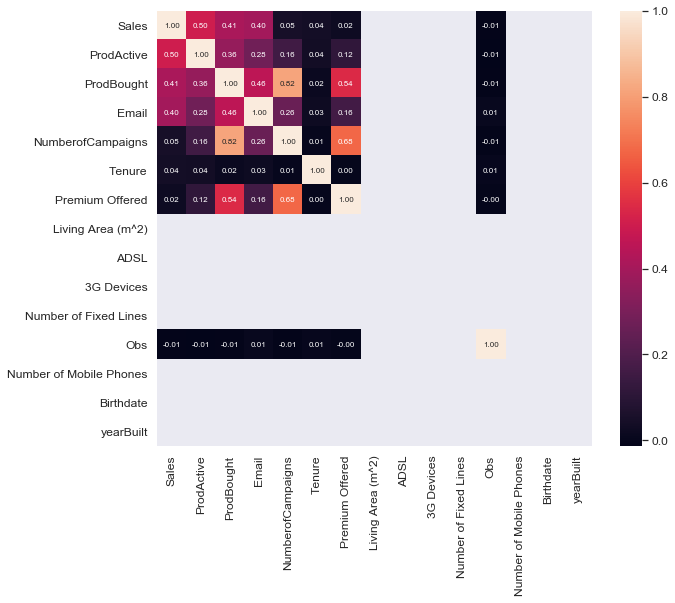

In [86]:
k = 15 #number of variables for heatmap
plt.figure(figsize=(10,8))
corrmat = num_feat0.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'Sales')['Sales'].index
cm = np.corrcoef(num_feat0[cols].values.T)
sns.set(font_scale=1.10)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [87]:
dataset[0]['Birthdate'].value_counts

<bound method IndexOpsMixin.value_counts of 0           NaN
1        1961.0
2        1950.0
3        1962.0
4        1969.0
          ...  
19995       NaN
19996    1983.0
19997    1965.0
19998       NaN
19999       NaN
Name: Birthdate, Length: 20000, dtype: float64>

In [93]:
s = dataset[0]['Birthdate'].value_counts(normalize=True)
missing = dataset[0]['Birthdate'].isnull()
dataset[0].loc[missing, 'Birthdate'] = np.random.choice(s.index, size=len(dataset[0][missing]),
                                                        p=s.values).astype(int)

In [91]:
dataset[0]['Birthdate']

0        1984.0
1        1961.0
2        1950.0
3        1962.0
4        1969.0
          ...  
19995    1956.0
19996    1983.0
19997    1965.0
19998    1981.0
19999    1979.0
Name: Birthdate, Length: 20000, dtype: float64

In [94]:
dataset[0]['ADSL'].value_counts()

1.0    3598
0.0    3566
Name: ADSL, dtype: int64

['Living Area (m^2)',
 'House Price',
 'Income',
 'House Insurance',
 'Pension Plan',
 'Credit',
 'Savings']

## Imputación de missing values por Regresión Linear

A través de la técnica del algoritmo de regresión, buscaríamos las X predictoras, y la imputamos a la Y donde serán nuestros valores nulos


#### Realizar una técnica de predicción de los missing values a través de dummy data

In [102]:
# creamos n valores dummies
from sklearn.datasets import make_regression
X, Y = make_regression(n_samples=1000, n_features=6, n_informative=3, n_targets=6,
                      tail_strength=0.5, noise=0.02,
                      shuffle=True, coef=False, random_state=0)

In [105]:
# convertimos a dataframe
icols = ['i0','i1','i2','i3','i4','i5']
jcols = ['j0', 'j1', 'j2', 'j3', 'j4', 'j5']

In [107]:
df = pd.concat([pd.DataFrame(X, columns=icols),
                  pd.DataFrame(Y, columns=jcols)], axis=1)
df

i0        i1        i2        i3        i4        i5         j0  \
0   -0.211620 -0.177927 -0.062205  0.267484 -0.317349  0.000341 -29.181970   
1    0.650085 -2.157356  0.455420  1.820939  0.222906 -0.128588  33.083675   
2   -0.753704 -0.518900 -1.084856  0.137690  1.117305 -1.045525  -0.960007   
3    0.008628  0.616887  0.196557  0.527004  0.354758 -0.729045   6.093584   
4    0.386166 -0.699318 -0.548087  0.100867  1.653150 -0.689048  83.150502   
..        ...       ...       ...       ...       ...       ...        ...   
995  0.938832  1.278529 -0.413762 -2.716280 -0.504132  1.544534   7.864333   
996  0.795276  1.718791 -1.612687 -0.562186 -0.169906  0.123785 -79.980853   
997  0.499647  0.397106  0.409295 -1.218684 -0.419082  0.516507   5.942031   
998  0.412598 -1.036867  0.104755  0.526392 -1.009401 -0.310311 -93.258837   
999  0.406415  2.133868 -0.369801 -0.193177  0.972536  0.239583  75.325485   

             j1          j2         j3         j4         j5  
0    -21.173256  -29.107925 -14.171796  -4.391721 -16.997783  
1     39.852602    9.634728  13.524905  16.722720  17.793147  
2    -96.017497   14.366129  25.193147 -44.904672 -77.475677  
3    -12.065385  -28.882816  10.487468   0.958951 -35.605051  
4     -3.161224   93.612659  57.443250 -17.327664  -2.471794  
..          ...         ...        ...        ...        ...  
995   38.404561   84.047974 -11.753842  -0.178329  86.752522  
996 -130.356486   -5.174045 -24.614747 -59.043839 -61.802896  
997   44.052029    5.093114  -8.242117  18.445798  39.350094  
998  -62.578037 -118.827256 -44.573631  -6.615454 -67.457658  
999   35.004804  109.490897  39.300150  -4.257937  49.424846  

[1000 rows x 12 columns]

In [110]:
# Introduce a few np.nans in there
df.loc[0, jcols] = np.nan
df.loc[10, jcols] = np.nan
df.loc[50, jcols] = np.nan
df.loc[100, jcols] = np.nan
df.loc[500, jcols] = np.nan
df.loc[999, jcols] = np.nan
df.head(5)

i0        i1        i2        i3        i4        i5         j0  \
0 -0.211620 -0.177927 -0.062205  0.267484 -0.317349  0.000341        NaN   
1  0.650085 -2.157356  0.455420  1.820939  0.222906 -0.128588  33.083675   
2 -0.753704 -0.518900 -1.084856  0.137690  1.117305 -1.045525  -0.960007   
3  0.008628  0.616887  0.196557  0.527004  0.354758 -0.729045   6.093584   
4  0.386166 -0.699318 -0.548087  0.100867  1.653150 -0.689048  83.150502   

          j1         j2         j3         j4         j5  
0        NaN        NaN        NaN        NaN        NaN  
1  39.852602   9.634728  13.524905  16.722720  17.793147  
2 -96.017497  14.366129  25.193147 -44.904672 -77.475677  
3 -12.065385 -28.882816  10.487468   0.958951 -35.605051  
4  -3.161224  93.612659  57.443250 -17.327664  -2.471794

In [112]:
notnans = df[jcols].notnull().all(axis=1)
df_notnans = df[notnans]
df_notnans

i0        i1        i2        i3        i4        i5          j0  \
1    0.650085 -2.157356  0.455420  1.820939  0.222906 -0.128588   33.083675   
2   -0.753704 -0.518900 -1.084856  0.137690  1.117305 -1.045525   -0.960007   
3    0.008628  0.616887  0.196557  0.527004  0.354758 -0.729045    6.093584   
4    0.386166 -0.699318 -0.548087  0.100867  1.653150 -0.689048   83.150502   
5    0.086583 -0.196234 -1.838847  1.419255  1.966764 -2.121176  -10.933228   
..        ...       ...       ...       ...       ...       ...         ...   
994 -1.372630  2.014014 -0.105190 -0.857428  1.356787  1.341763  167.705484   
995  0.938832  1.278529 -0.413762 -2.716280 -0.504132  1.544534    7.864333   
996  0.795276  1.718791 -1.612687 -0.562186 -0.169906  0.123785  -79.980853   
997  0.499647  0.397106  0.409295 -1.218684 -0.419082  0.516507    5.942031   
998  0.412598 -1.036867  0.104755  0.526392 -1.009401 -0.310311  -93.258837   

             j1          j2         j3         j4          j5  
1     39.852602    9.634728  13.524905  16.722720   17.793147  
2    -96.017497   14.366129  25.193147 -44.904672  -77.475677  
3    -12.065385  -28.882816  10.487468   0.958951  -35.605051  
4     -3.161224   93.612659  57.443250 -17.327664   -2.471794  
5   -181.034222    1.564074  42.568378 -79.872604 -156.472663  
..          ...         ...        ...        ...         ...  
994  145.250334  237.748984  68.923959  21.205027  167.685160  
995   38.404561   84.047974 -11.753842  -0.178329   86.752522  
996 -130.356486   -5.174045 -24.614747 -59.043839  -61.802896  
997   44.052029    5.093114  -8.242117  18.445798   39.350094  
998  -62.578037 -118.827256 -44.573631  -6.615454  -67.457658  

[994 rows x 12 columns]

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(df_notnans[icols], 
                                                   df_notnans[jcols],
                                                    train_size=0.80,
                                                    random_state=42)

In [115]:
X_train.shape, X_test.shape

((795, 6), (199, 6))

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

regr_multirf = MultiOutputRegressor(RandomForestRegressor(max_depth=30, random_state=42))

In [117]:
# Entreno del modelo
regr_multirf.fit(X_train, Y_train)
score = regr_multirf.score(X_test, Y_test)

In [118]:
score*100

97.90367460432567

#### Predicción de los nan

evaluar nuestro modelo de regresión a los datos MISSING

In [119]:
df_nans = df.loc[~notnans].copy()
df_nans

i0        i1        i2        i3        i4        i5  j0  j1  j2  \
0   -0.211620 -0.177927 -0.062205  0.267484 -0.317349  0.000341 NaN NaN NaN   
10   1.138974 -1.326378  0.123960  0.982841  0.273958  0.414307 NaN NaN NaN   
50  -0.805489  0.922355 -2.438133  1.817659 -0.165711 -0.021283 NaN NaN NaN   
100 -0.682390 -1.431414 -0.328235 -0.886463  1.212363 -0.577676 NaN NaN NaN   
500  0.819953 -1.374794  1.511865  1.061435  0.322205 -1.228095 NaN NaN NaN   
999  0.406415  2.133868 -0.369801 -0.193177  0.972536  0.239583 NaN NaN NaN   

     j3  j4  j5  
0   NaN NaN NaN  
10  NaN NaN NaN  
50  NaN NaN NaN  
100 NaN NaN NaN  
500 NaN NaN NaN  
999 NaN NaN NaN

In [122]:
# Aplico la regresión a mi modelo
df_nans[jcols] = regr_multirf.predict(df_nans[icols])
df_nans

i0        i1        i2        i3        i4        i5          j0  \
0   -0.211620 -0.177927 -0.062205  0.267484 -0.317349  0.000341  -35.683611   
10   1.138974 -1.326378  0.123960  0.982841  0.273958  0.414307   57.408519   
50  -0.805489  0.922355 -2.438133  1.817659 -0.165711 -0.021283 -113.659974   
100 -0.682390 -1.431414 -0.328235 -0.886463  1.212363 -0.577676   76.823959   
500  0.819953 -1.374794  1.511865  1.061435  0.322205 -1.228095   39.540636   
999  0.406415  2.133868 -0.369801 -0.193177  0.972536  0.239583   72.948313   

             j1          j2         j3         j4         j5  
0    -15.447944  -32.857759 -16.218113  -4.890633 -18.635277  
10    48.042058   59.017123  17.785760   9.634863  58.768441  
50  -222.309673  -24.121074 -35.869576 -85.540343 -77.257707  
100    1.877995   76.700382  45.922407 -10.794247   9.758691  
500   64.844895  -72.310774  20.788572  44.313537 -35.525735  
999   36.272955  111.431191  41.441306  -7.732599  41.613135

* * *
FIN PoC

### Aplicamos la regresión a nuestro dataset original

**LIVING AREA**

In [124]:
jcols = ['Living Area (m^2)']
notnans = dataset[0][jcols].notnull().all(axis=1)
df_notnans = dataset[0][notnans]

In [125]:
k = 16
icols = corrmat.nlargest(k, 'Living Area (m^2)')['Living Area (m^2)'].index
icols

Index(['Living Area (m^2)', 'House Price', 'Income', 'House Insurance',
       'Credit', 'Pension Plan', 'Savings', 'Birthdate', '3G Devices', 'Sales',
       'Number of Mobile Phones', 'Obs', 'Email', 'Tenure', 'ProdActive',
       'Number of Semesters Paid'],
      dtype='object')

In [126]:
icols = icols.drop('Living Area (m^2)')
icols

Index(['House Price', 'Income', 'House Insurance', 'Credit', 'Pension Plan',
       'Savings', 'Birthdate', '3G Devices', 'Sales',
       'Number of Mobile Phones', 'Obs', 'Email', 'Tenure', 'ProdActive',
       'Number of Semesters Paid'],
      dtype='object')

In [127]:
df_notnans[jcols]['Living Area (m^2)']

0          68.28964
1          85.60244
2         170.12964
3         158.64584
6         211.38824
            ...    
19995      95.37104
19996      96.42964
19997    1009.63964
19998     414.67964
19999      57.75724
Name: Living Area (m^2), Length: 14864, dtype: float64

In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(df_notnans[icols], 
                                                   df_notnans[jcols],
                                                    train_size=0.80,
                                                    random_state=42)

In [138]:
X_train.shape, X_test.shape

((11891, 15), (2973, 15))

In [139]:
Y_train

Living Area (m^2)
9946           125.10564
12139           33.95884
10362          927.89964
3732           330.25964
11162          874.29964
...                  ...
7020            71.94784
18071          127.51764
7288           172.44784
1170           393.23964
9782            64.33664

[11891 rows x 1 columns]

In [140]:
# Contruimos el modelo
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').